In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# 1, 最小二乗法

In [6]:
def least_squares_method(X_train, X_test, Y_train, Y_test):
    Y_train = np.where(Y_train == 0, -1, Y_train) # 奇数のところだけcの要素に取り替える。
    Y_test = np.where(Y_test == 0, -1, Y_test) # 奇数のところだけcの要素に取り替える。

    x_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    x_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    # Calculation with hat matrix
    w = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(Y_train)

    # predict
    Y_train_pred = np.array([1 if w.dot(x) > 0 else -1 for x in x_train])
    Y_test_pred = np.array([1 if w.dot(x) > 0 else -1 for x in x_test])

    score("Least Squares", Y_train, Y_train_pred, Y_test, Y_test_pred) 

    return w

# 2, フィッシャー判別

In [7]:
def fisher(X_train, X_test, Y_train, Y_test):
    # LDA
    lda = LDA()
    lda.fit(X_train, Y_train)

    # predict
    Y_train_pred = lda.predict(X_train)
    Y_test_pred = lda.predict(X_test)

    coef = lda.coef_[0]
    intercept = lda.intercept_
    
    score("Fisher", Y_train, Y_train_pred, Y_test, Y_test_pred) 

    return np.hstack((intercept, coef))

In [34]:
def lda(X_train, X_test, Y_train, Y_test):
    # LDA
    lda = LDA()
    lda.fit(X_train, Y_train)

    # predict
    Y_train_pred = lda.predict(X_train)
    Y_test_pred = lda.predict(X_test)

    coef = lda.coef_[0]
    intercept = lda.intercept_
    
    score("Fisher", Y_train, Y_train_pred, Y_test, Y_test_pred) 

    return np.hstack((intercept, coef))

# 3, ロジスティック

In [9]:
def logistic(X_train, X_test, Y_train, Y_test):
    # LogisticRegression
    logreg = LogisticRegression(penalty='l2', solver="sag")
    logreg.fit(X_train, Y_train)

    # predict
    Y_train_pred = logreg.predict(X_train)
    Y_test_pred = logreg.predict(X_test)

    coef = logreg.coef_[0]
    intercept = logreg.intercept_

    score("Logistic", Y_train, Y_train_pred, Y_test, Y_test_pred) 

    return np.hstack((intercept, coef))

# スコア・プロット

In [10]:
def score(method_name, Y_train, Y_train_pred, Y_test, Y_test_pred):
    print(method_name)
    print(f"train precision score = {precision_score(Y_train, Y_train_pred)}")
    print(f"test  precision score = {precision_score(Y_test, Y_test_pred)}")

In [11]:
def plot(method_names, W, X, Y):
    plt.figure(figsize=(8, 7))
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
    max_value = X.max() + 1
    min_value = X.min() - 1
    
    line = np.linspace(min_value, max_value)
    
    for method_name, w in zip(method_names, W):
        print(method_name)
        print(w)
        plt.plot(line, -(line * w[1] + w[0]) / w[2], label=method_name)
    plt.ylim(min_value, max_value)
    plt.xlim(min_value, max_value)
    plt.legend()

In [12]:
def run(X, Y):
    # print(X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

    # print(X_train, X_test, Y_train, Y_test)
    w = []
    w.append(least_squares_method(X_train, X_test, Y_train, Y_test))
    w.append(fisher(X_train, X_test, Y_train, Y_test))
    w.append(logistic(X_train, X_test, Y_train, Y_test))
    
    method_name = ["least squares method", "fisher", "logistic"] 
    
    plot(method_name, w, X, Y)

Least Squares
train precision score = 0.8571428571428571
test  precision score = 0.9615384615384616
Fisher
train precision score = 0.8571428571428571
test  precision score = 0.9615384615384616
Logistic
train precision score = 0.8666666666666667
test  precision score = 0.96
least squares method
[-0.11277893  0.05604442  0.55013459]
fisher
[-0.50670236  0.2513125   2.46689497]
logistic
[-0.72247959  0.43174012  2.33549184]


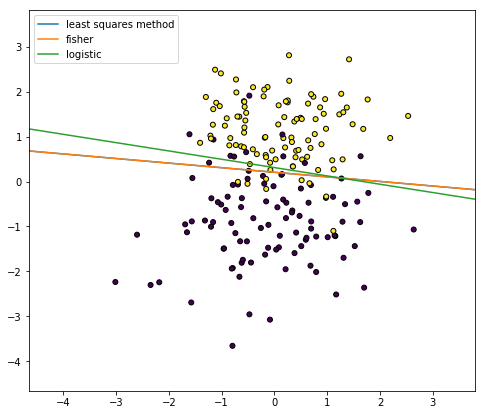

In [16]:
def main():
    X_data, Y_data = make_classification(random_state=12,
                               n_samples=200,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X_data, Y_data)

main()

Least Squares
train precision score = 0.8695652173913043
test  precision score = 0.7142857142857143
Fisher
train precision score = 0.8695652173913043
test  precision score = 0.7142857142857143
Logistic
train precision score = 0.9090909090909091
test  precision score = 0.7142857142857143
least squares method
[ 0.13869916  0.65163308 -0.01370011]
fisher
[ 0.65184937  3.00839405 -0.0632493 ]
logistic
[0.2517127  1.72682693 0.03878334]


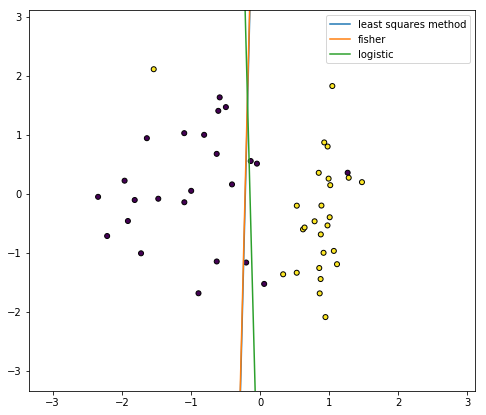

In [17]:
def main2():
    X_data, Y_data = make_classification(random_state=12,
                               n_samples=50,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=1,
                               n_clusters_per_class=1,
                               n_classes=2)
    run(X_data, Y_data)

main2()